In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 34.6 MB 634 kB/s
     |████████████████████████████████| 10.1 MB 63 kB/s 
     |████████████████████████████████| 636 kB 43.1 MB/s 
     |████████████████████████████████| 102 kB 44.8 MB/s 
     |████████████████████████████████| 675 kB 68.7 MB/s 
     |████████████████████████████████| 3.1 MB 55.4 MB/s 
     |████████████████████████████████| 62 kB 762 kB/s 
     |████████████████████████████████| 812 kB 54.3 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=cb75c4cdea2848000aca3fd8c9fcc65b6e737e6ef8a20bbc38807a9552451a1d
  Stored in directory: /tmp/pip-ephem-wheel-cache-1jmntelf/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=598a3da0b6e29443003fb5af77fad32781cbefc05dac5fe7fa8d1817fd36548b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d2

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

from google.colab import files

In [ ]:
train_file_path = 'https://raw.githubusercontent.com/darnellkikoo/AlgoBC_FProject/main/assets/dev.csv'

In [ ]:
# from pandas_profiling import ProfileReport
df = pd.read_csv(train_file_path)

In [ ]:
# profile = ProfileReport(df, title = 'Insurance Cross Prediction Dataset', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()
# # profile.to_file(output_file='output.html')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    304887 non-null  int64  
 1   Gender                304887 non-null  object 
 2   Age                   304887 non-null  int64  
 3   Driving_License       304887 non-null  int64  
 4   Region_Code           304887 non-null  float64
 5   Previously_Insured    304887 non-null  int64  
 6   Vehicle_Age           304887 non-null  object 
 7   Vehicle_Damage        304887 non-null  object 
 8   Annual_Premium        304887 non-null  float64
 9   Policy_Sales_Channel  304887 non-null  float64
 10  Vintage               304887 non-null  int64  
 11  Response              304887 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 27.9+ MB


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,138389,Male,47,1,28.0,0,1-2 Year,Yes,33823.0,26.0,172,0
1,149691,Male,45,1,28.0,0,1-2 Year,Yes,2630.0,124.0,17,0
2,213565,Male,23,1,7.0,1,< 1 Year,No,34669.0,152.0,126,0
3,278877,Male,23,1,8.0,1,< 1 Year,No,29887.0,152.0,67,0
4,181394,Female,39,1,41.0,0,1-2 Year,Yes,35636.0,124.0,16,0


# Preparing Data

For visualization purpose, we will encode the feature Response, changing 1 into **Interested** and 0 into **Disinterested**

In [ ]:
df.loc[df['Response'] == 1, 'Response'] = 'Interested'
df.loc[df['Response'] == 0, 'Response'] = 'Disinterested'

In [ ]:
#Encode DataType
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('category').cat.codes

In [ ]:
def kruskal_price(feature,df):
  group_df = df[[feature, 'Response']].dropna().groupby([feature])
  group_list =[]
  val = df[feature].dropna().unique()
  for i in val:
    group_list.append(group_df.get_group(i)['Response'])
  
  h_stat, p_val = stats.kruskal(*group_list)
  print('Kruskal-Wallis Test results of {}\nH Stat = {}\nP = {}'.format(feature,h_stat, p_val))

In [ ]:
def without_hue(data,feature,ax):
    total=(len(data))
    bars_plot=ax.patches
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()-5
        ax.text(x, y,(percentage,bars.get_height()),ha='center')

# Unclear Features

Text(0.5, 1.0, 'Region Code in India Distribution')

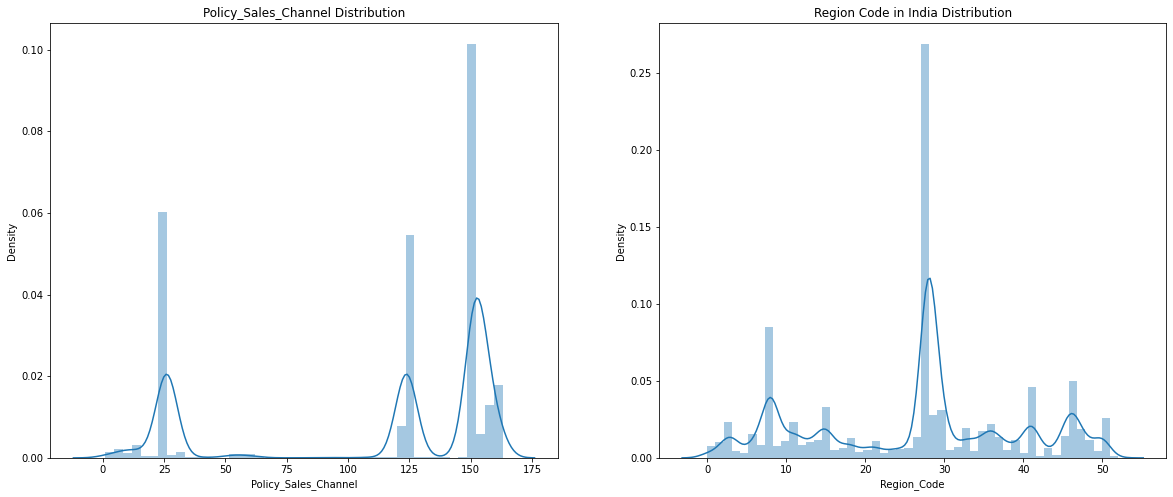

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.distplot(a = df['Policy_Sales_Channel'], ax = ax[0])
ax[0].set_title("Policy_Sales_Channel Distribution")
sns.distplot(a = df['Region_Code'], ax = ax[1])
ax[1].set_title("Region Code in India Distribution")

Both Policy_Sales_Channel and Region_Code feature are unclear features. 

Policy_Sales_Channel is an anonymized data from the insurance company. Hence, we decided to pick the row which has the value above 0

For Region_Code feature, there are 50++ distinct values from 0-52. However,  [Office of the Registrar General & Census Commissioner, India](https://censusindia.gov.in/Census_Data_2001/PLCN/plcn.html) mentioned that there are only 35 region codes. So we decided to just drop this column because of the unexplained distribution.

# Categorical Feature Counts

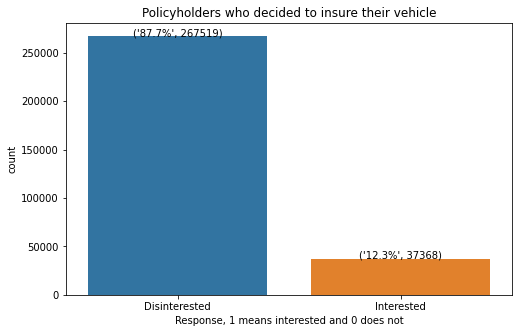

In [ ]:
plt.figure(figsize=(8,5))
a = sns.countplot(x=df['Response'])
without_hue(df,'Response',a)
plt.title("Policyholders who decided to insure their vehicle")
plt.xlabel("Response, 1 means interested and 0 does not")
plt.show()

We can see that only 12.3% policyholders decided to buy an insurance for their vehicle, that is really a small amount

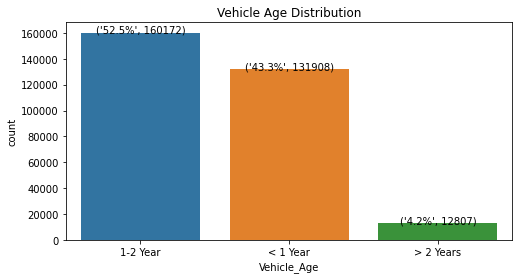

In [ ]:
plt.figure(figsize=(8,4))
a=sns.countplot(x = df['Vehicle_Age'])
without_hue(df, 'Vehicle_Age', a)
plt.title("Vehicle Age Distribution")
plt.show()

We can see that the majority age of cars are between 1-2 Year and less than 1 year

Text(0.5, 0, 'Driving License')

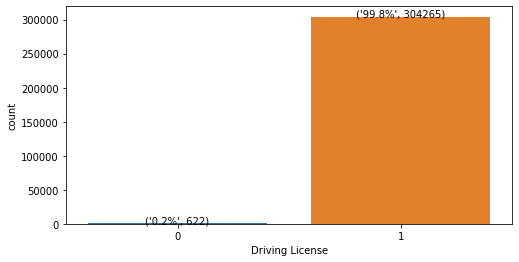

In [ ]:
plt.figure(figsize=(8,4))
a=sns.countplot(x = "Driving_License", data = df)
without_hue(df, 'Vehicle_Age', a)
plt.xlabel("Driving License")

The number of people who doesn't have driving license is only 622, really small compared to the ones who have, 304265. In fact, it is really rare to find people who doesn't have any driving license and buy a vehicle insurance. Hence, we decided to later remove the row of the ones who doesn't have any driving license, assuming that there's a misstyping in data collection

Text(0.5, 0, 'Customers who have ever insured their vehicle')

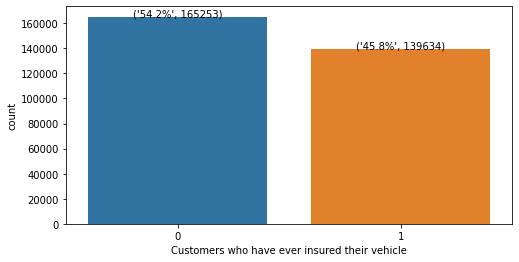

In [ ]:
plt.figure(figsize=(8,4))
a=sns.countplot(x = "Previously_Insured", data = df)
without_hue(df, 'Vehicle_Age', a)
plt.xlabel("Customers who have ever insured their vehicle")

The ratio of customers who had ever or not insured their vehicle doesn't seem to show significant differences.

In [ ]:
category_col = ['Gender', 'Vehicle_Damage', 'Driving_License', 'Vehicle_Age', 'Previously_Insured']
quantitative_col = ['Age', 'Vintage', 'Annual_Premium']

In [ ]:
df1 = df.copy()
df1.loc[df1['Response'] == 1, 'Response'] = 'Interested'
df1.loc[df1['Response'] == 0, 'Response'] = 'Disinterested'
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,138389,Male,47,1,28.0,0,1-2 Year,1,33823.0,26.0,172,Disinterested
1,149691,Male,45,1,28.0,0,1-2 Year,1,2630.0,124.0,17,Disinterested
2,213565,Male,23,1,7.0,1,< 1 Year,0,34669.0,152.0,126,Disinterested
3,278877,Male,23,1,8.0,1,< 1 Year,0,29887.0,152.0,67,Disinterested
4,181394,Female,39,1,41.0,0,1-2 Year,1,35636.0,124.0,16,Disinterested
...,...,...,...,...,...,...,...,...,...,...,...,...
304882,105921,Female,25,1,41.0,1,< 1 Year,0,27556.0,152.0,133,Disinterested
304883,344860,Female,57,1,35.0,0,1-2 Year,1,44065.0,10.0,54,Interested
304884,280774,Female,35,1,11.0,1,1-2 Year,0,35718.0,152.0,105,Disinterested
304885,245303,Male,26,1,16.0,1,< 1 Year,0,15148.0,152.0,258,Disinterested


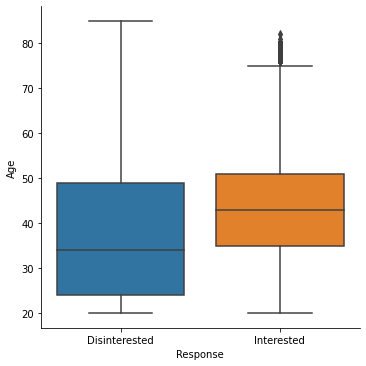

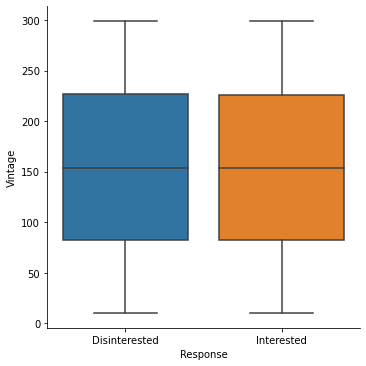

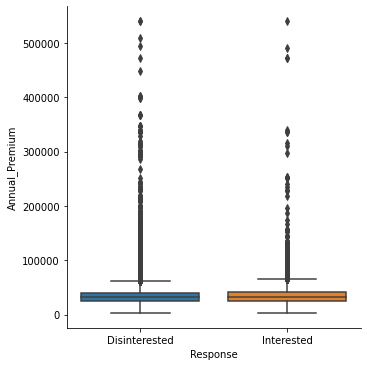

In [ ]:
#Renaming 1 into Interested, and 0 Disinteredted

def makeBoxplot(df, columnName):
  sns.catplot(x = "Response", y = columnName, data = df, kind ="box")

for column in quantitative_col:
  makeBoxplot(df, column)

In [ ]:
col_morethan100 = df[df['Annual_Premium'] < 100000]
col_morethan100['Response'].value_counts()

Disinterested    266984
Interested        37268
Name: Response, dtype: int64

The boxplost tells us that there is a really big outlier in the Annual_Premium feature, we will drop it in the preprocessing

# Vehicle_Age, Gender, Vehicle_Damage Counts based on the Response

In [ ]:
def makeCountsResponse(columnName):
  plt.figure(figsize = (8,4))
  a=df.groupby([columnName,'Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
  g = sns.catplot(x=columnName, y="count",col="Response", data=a, kind="bar")
  plt.show()

<Figure size 576x288 with 0 Axes>

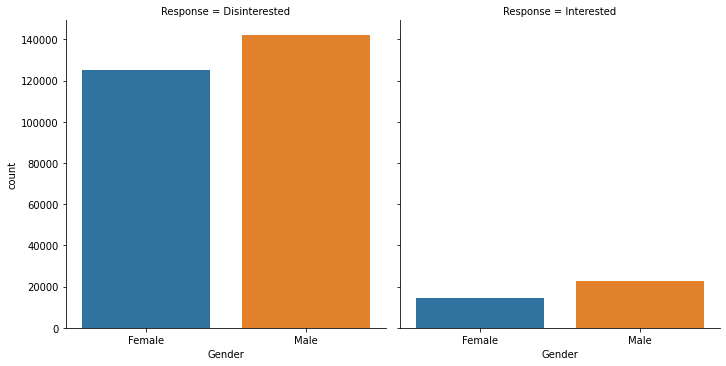

In [ ]:
makeCountsResponse('Gender')

In [ ]:
Total_Male = df[df['Gender'] == 'Male'].shape[0]
Total_Female = df[df['Gender'] == 'Female'].shape[0]

Total_Male_Buy = df[(df['Gender'] == 'Male') & (df['Response'] == 'Interested')].shape[0]

Total_Female_Buy = df[(df['Gender'] == 'Female') & (df['Response'] == 'Interested')].shape[0]

Total_Male_Buy_Pct = Total_Male_Buy / Total_Male * 100
Total_Female_Buy_Pct =  Total_Female_Buy / Total_Female * 100
print("Total male buy Insurance : " + str(Total_Male_Buy_Pct))
print("Total female buy Insurance : " + str(Total_Female_Buy_Pct))

Total male buy Insurance : 13.813196541395326
Total female buy Insurance : 10.421891187082485


From the calculations, males are more likely to buy Insurance vehicle, with a bigger margin of around 3% from Female

<Figure size 576x288 with 0 Axes>

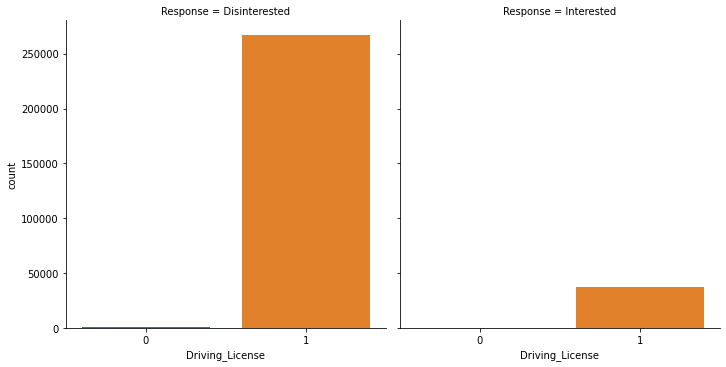

In [ ]:
makeCountsResponse('Driving_License')

<Figure size 576x288 with 0 Axes>

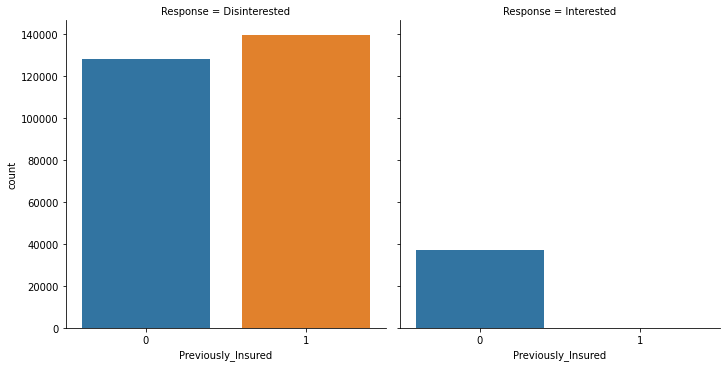

In [ ]:
makeCountsResponse('Previously_Insured')

People who are interested in buying vehicle insurance are those who have ever bought vehicle insurance in the past

<Figure size 576x288 with 0 Axes>

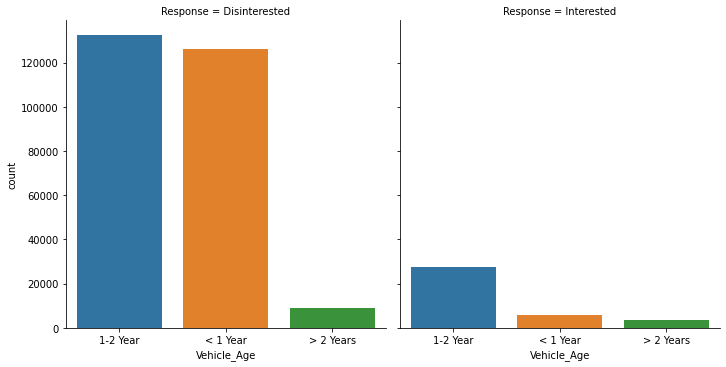

In [ ]:
makeCountsResponse('Vehicle_Age')

In [ ]:
Total_12 = df[df['Vehicle_Age'] == '1-2 Year'].shape[0]
Total_LT1 = df[df['Vehicle_Age'] == '< 1 Year'].shape[0]
Total_MT2 = df[df['Vehicle_Age'] == '> 2 Years'].shape[0]


Total_12_Buy = df[(df['Vehicle_Age'] == '1-2 Year') & (df['Response'] == 'Interested')].shape[0]
Total_LT1_Buy = df[(df['Vehicle_Age'] == '< 1 Year') & (df['Response'] == 'Interested')].shape[0]
Total_MT2_Buy = df[(df['Vehicle_Age'] == '> 2 Years') & (df['Response'] == 'Interested')].shape[0]
print(Total_MT2_Buy, Total_MT2)

Total_12_Buy_Pct = Total_12_Buy / Total_12 * 100
Total_LT1_Buy_Pct =  Total_LT1_Buy/Total_LT1 * 100
Total_MT2_Buy_Pct= Total_MT2_Buy/Total_MT2 * 100
print("Customer's Vehicle Age 1-2 Year and buy Insurance : " + str(Total_12_Buy_Pct))
print("Customer's Vehicle Age Less Than 1 Year and buy Insurance : " + str(Total_LT1_Buy_Pct))
print("Customer's Vehicle Age More Than 2 Years and buy Insurance : " + str(Total_MT2_Buy_Pct))

3795 12807
Customer's Vehicle Age 1-2 Year and buy Insurance : 17.322628174712186
Customer's Vehicle Age Less Than 1 Year and buy Insurance : 4.417472784061618
Customer's Vehicle Age More Than 2 Years and buy Insurance : 29.63223237292106


We can see that from all customers who have his car aged more than 2 years, 29.6% of them were interested in buying vehicle insurance.

<Figure size 576x288 with 0 Axes>

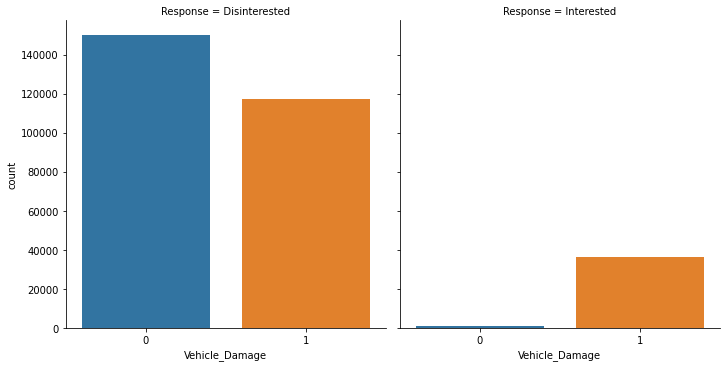

In [ ]:
makeCountsResponse('Vehicle_Damage')

In [ ]:
Total_Damage = df[df['Vehicle_Damage'] == 1].shape[0]
Total_NoDamage = df[df['Vehicle_Damage'] == 0].shape[0]

Total_Damage_Buy = df[(df['Vehicle_Damage'] == 1) & (df['Response'] == 1)].shape[0]
print(Total_Damage_Buy)
Total_NoDamage_Buy = df[(df['Vehicle_Damage'] == 0) & (df['Response'] == 1)].shape[0]
print(Total_NoDamage_Buy)
Total_Damage_Buy_Pct = Total_Damage_Buy / Total_Damage * 100
Total_NoDamage_Buy_Pct =  Total_NoDamage_Buy / Total_NoDamage * 100
print("Customers who have ever had their vehicle damaged and buy Insurance : " + str(Total_Damage_Buy_Pct))
print("Customers who never had their vehicle damaged and buy Insurance : " + str(Total_NoDamage_Buy_Pct))

36580
788
Customers who have ever had their vehicle damaged and buy Insurance : 23.74075973027174
Customers who never had their vehicle damaged and buy Insurance : 0.5225256289537551


We can see that the majority of people who buy insurance, are the one who have had their vehicle damaged in the past, getting 23% out of all data, while the other only got 0.52%

# Numerical Columns Distribution


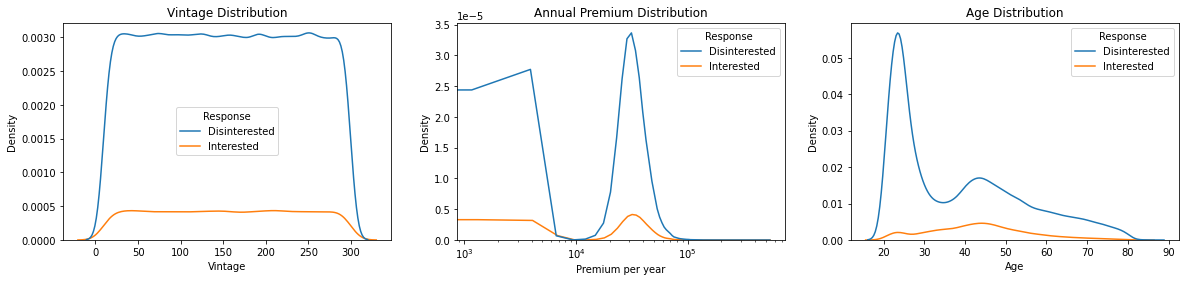

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20,4))
sns.kdeplot(x = df['Vintage'], ax = ax[0], hue = df['Response'])
ax[0].set_title("Vintage Distribution")
sns.kdeplot(x = df['Annual_Premium'],hue = df['Response'], ax = ax[1])
ax[1].set_title("Annual Premium Distribution")
ax[1].set_xlabel("Premium per year")
ax[1].set_xscale('log')
sns.kdeplot(x = df['Age'], hue = df['Response'], ax = ax[2])
ax[2].set_title("Age Distribution")
ax[2].set_xlabel("Age")

plt.show()

We can see that the Vintage feature are randomly distributed, while the Premium per Year feature are condensed in the range of 0-100000. Lastly, the Age Distribution are concentrated on the age 20's, but the one who bought the insurance are mainly in the range of 50-60

The kdeplot shows that the highes number of customer in buying the vehicle insurance is on the age range between 40-50

# Correlation

Let's See the correlation between numerical values and the target "Response"

Turning back our 'Interested' and 'Disinterested' Rows of Response to 0 and 1

In [ ]:
df.loc[df['Response'] == 'Disinterested', 'Response'] = 0
df.loc[df['Response'] == 'Interested', 'Response'] = 1

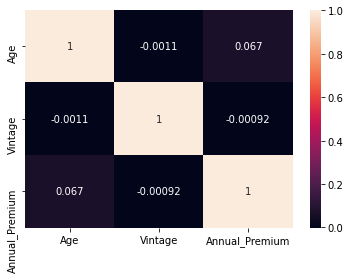

In [ ]:
num_col = ['Age', 'Vintage', 'Annual_Premium', 'Response']
num_df = df[num_col]
sns.heatmap(num_df.corr(), cmap = 'rocket', annot = True)

Now we will check the correlation between categorical variables with the target(Response)

Since what we have left are categorical columns
(Gender Previously Insured, Vehicle Age, Vehicle Damage)

In [ ]:
Categorical = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for i in Categorical:
  kruskal_price(i, df)
  print()

Kruskal-Wallis Test results of Gender
H Stat = 809.6826408737934
P = 4.2354192395808124e-178

Kruskal-Wallis Test results of Previously_Insured
H Stat = 35440.63114163706
P = 0.0

Kruskal-Wallis Test results of Vehicle_Age
H Stat = 14955.41399255504
P = 0.0

Kruskal-Wallis Test results of Vehicle_Damage
H Stat = 38204.02112771305
P = 0.0



Since all of the P values is below 0.05, we can deny the hypothesis that these categorical column doesn't affect the Response of the customers. We will see the corellation of these categorical values with Response using **Cramer's V heatmap**

In [ ]:
from itertools import combinations
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

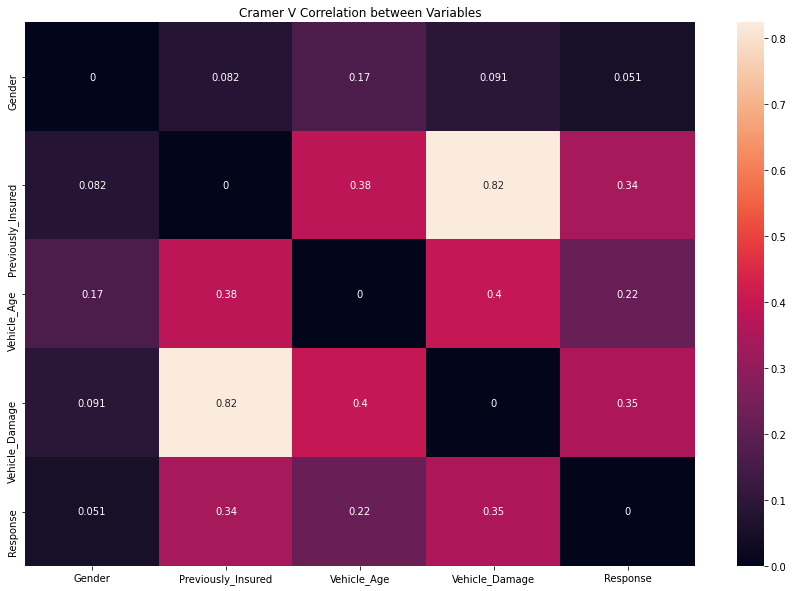

In [ ]:
cols = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
# fitur kategorikal yang diambil yang sekiranya dapat di korelasikan dengan 'Price', kategori geographical yang diambil hanya yang mempunyai distinct data yg kecil
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");